In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense,LSTM
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
df = pd.read_csv("Musical_instruments_reviews.csv")

In [4]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [5]:
df.isna().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         7
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [6]:
df.reviewText.fillna("",inplace = True)

In [7]:
del df['reviewerID']
del df['asin']
del df['reviewerName']
del df['helpful']
del df['unixReviewTime']
del df['reviewTime']

In [8]:
df.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [9]:
df['text'] = df['reviewText'] + ' ' + df['summary']
del df['reviewText']
del df['summary']

In [10]:
df.head()

,overall,text
0,5.0,"Not much to write about here, but it does exac..."
1,5.0,The product does exactly as it should and is q...
2,5.0,The primary job of this device is to block the...
3,5.0,Nice windscreen protects my MXL mic and preven...
4,5.0,This pop filter is great. It looks and perform...


In [11]:
df.overall.value_counts()

5.0    6938
4.0    2084
3.0     772
2.0     250
1.0     217
Name: overall, dtype: int64

In [12]:
def sentiment_rating(rating):
    # Replacing ratings of 1,2,3 with 0 (not good) and 4,5 with 1 (good)
    if(int(rating) == 1 or int(rating) == 2 or int(rating) == 3):
        return 0
    else: 
        return 1
df.overall = df.overall.apply(sentiment_rating) 

In [13]:
df.overall.value_counts()

1    9022
0    1239
Name: overall, dtype: int64

In [14]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [15]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [16]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            pos = pos_tag([i.strip()])
            word = lemmatizer.lemmatize(i.strip(),get_simple_pos(pos[0][1]))
            final_text.append(word.lower())
    return " ".join(final_text)

In [17]:
df.text = df.text.apply(lemmatize_words)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.overall,test_size = 0.2 , random_state = 0)

In [19]:
good = x_train[y_train[y_train == 1].index]
bad = x_train[y_train[y_train == 0].index]
x_train.shape,good.shape,bad.shape

((8208,), (7197,), (1011,))

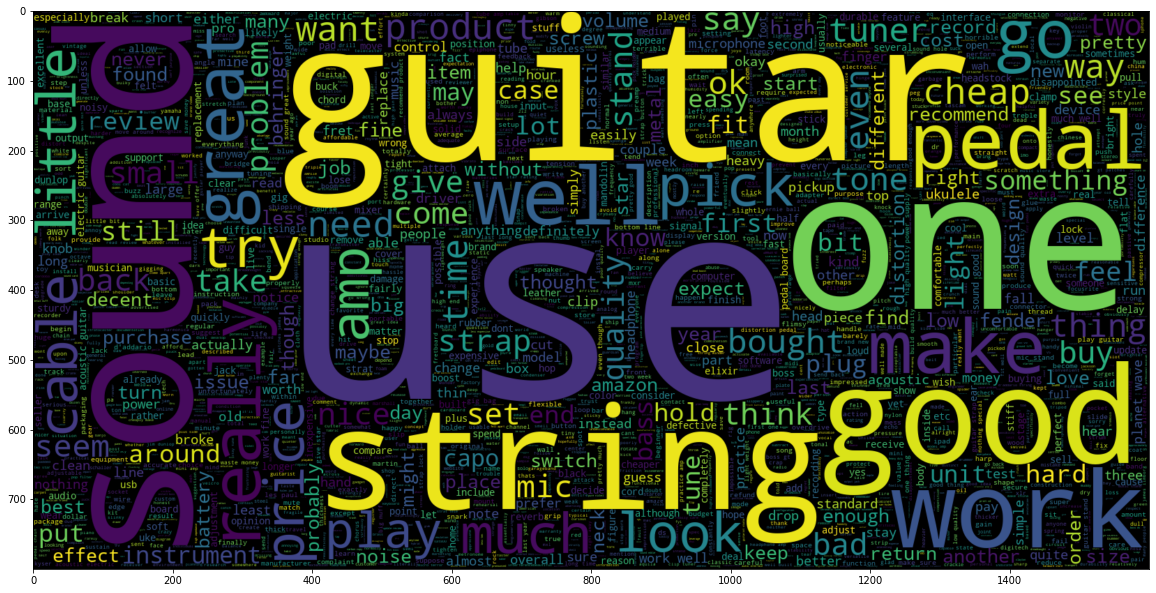

In [20]:
plt.figure(figsize = (20,20)) # Text Reviews with Poor Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(bad))
plt.imshow(wc,interpolation = 'bilinear')

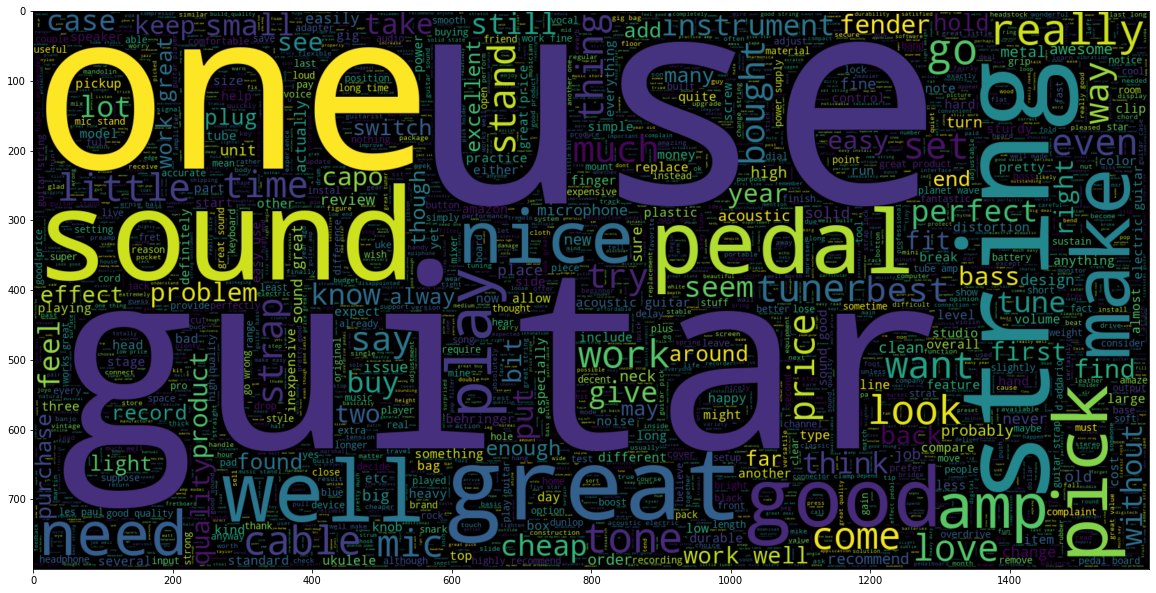

In [21]:
plt.figure(figsize = (20,20)) #Text Reviews with Good Ratings
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800).generate(" ".join(good))
plt.imshow(wc,interpolation = 'bilinear')

In [23]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

cv_train_reviews=cv.fit_transform(x_train)

cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (8208, 573616)
BOW_cv_test: (2053, 573616)


In [25]:
model = Sequential()
model.add(Dense(units = 75 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu')) 
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 75)                43021275  
_________________________________________________________________
dense_2 (Dense)              (None, 50)                3800      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 43,026,621
Trainable params: 43,026,621
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5
8208/8208 [==============================] - 229s 28ms/step - loss: 0.4137 - accuracy: 0.8743
Epoch 2/5
8208/8208 [==============================] - 227s 28ms/step - loss: 0.0278 - accuracy: 0.9849
Epoch 3/5
8208/8208 [==============================] - 230s 28ms/step - loss: 1.6949e-04 - accuracy: 1.0000
Epoch 4/5
8208/8208 [==============================] - 224s 27ms/step - loss: 8.5529e-05 - accuracy: 1.0000
Epoch 5/5
8208/8208 [==============================] - 217s 26ms/step - loss: 6.0061e-05 - accuracy: 1.0000


In [28]:
model.evaluate(cv_test_reviews,y_test)[1]

2053/2053 [==============================] - 23s 11ms/step


0.8894301056861877